# Simple Linear Regression

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Generate random  data.

In [4]:
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns = ['area', 'price'])
data.head()

,area,price
0,29.410131,760.253272
1,26.000393,679.009826
2,27.446845,738.171124
3,30.602233,817.055825
4,29.668895,791.722374


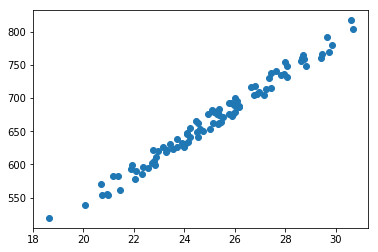

In [5]:
plt.scatter(data['area'], data['price'])
plt.show()

In [6]:
W = sum(price*(area - np.mean(area))) / sum((area - np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are: ", W, b)

The regression coefficients are:  24.815544052284988 43.4989785533412


In [8]:
y_pred = W*area + b

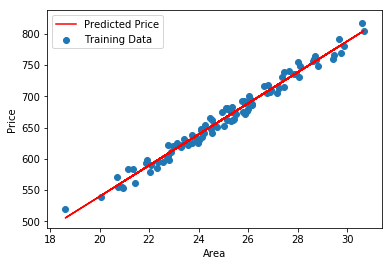

In [9]:
plt.plot(area, y_pred, color = "red", label = "Predicted Price")
plt.scatter(data['area'], data['price'], label = "Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [10]:
(sum((area - y_pred)**2))

41634102.99180779

# Multiple Regression.

In [11]:
import tensorflow.feature_column as fc
from tensorflow.keras.datasets import boston_housing

## Load data set

In [12]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [13]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x_train_df = pd.DataFrame(x_train, columns = features)
x_test_df = pd.DataFrame(x_test, columns = features)
y_train_df = pd.DataFrame(y_train, columns = ['MEDV'])
y_test_df = pd.DataFrame(y_test, columns = ['MEDV'])

In [14]:
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [15]:
feature_columns = []
for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

In [21]:
def estimator_input_fn(df_data, df_label, epochs = 10, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function
train_input_fn = estimator_input_fn(x_train_df,y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs = 1, shuffle = False)

In [24]:
linear_est = tf.estimator.LinearRegressor(feature_columns = feature_columns)
linear_est.train(train_input_fn, steps = 100)
results = linear_est.evaluate(val_input_fn )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Gerard\\AppData\\Local\\Temp\\tmptphbzn3y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024E334A6B70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Check

In [20]:
train_stats = x_train_df.describe()
train_stats = train_stats.T
print(train_stats)

         count        mean         std        min         25%        50%  \
CRIM     404.0    3.745111    9.240734    0.00632    0.081437    0.26888   
ZN       404.0   11.480198   23.767711    0.00000    0.000000    0.00000   
INDUS    404.0   11.104431    6.811308    0.46000    5.130000    9.69000   
CHAS     404.0    0.061881    0.241238    0.00000    0.000000    0.00000   
NOX      404.0    0.557356    0.117293    0.38500    0.453000    0.53800   
RM       404.0    6.267082    0.709788    3.56100    5.874750    6.19850   
AGE      404.0   69.010644   27.940665    2.90000   45.475000   78.50000   
DIS      404.0    3.740271    2.030215    1.12960    2.077100    3.14230   
RAD      404.0    9.440594    8.698360    1.00000    4.000000    5.00000   
TAX      404.0  405.898515  166.374543  188.00000  279.000000  330.00000   
PTRATIO  404.0   18.475990    2.200382   12.60000   17.225000   19.10000   
B        404.0  354.783168   94.111148    0.32000  374.672500  391.25000   
LSTAT    404

In [18]:
print(results)

{'average_loss': 70.95062, 'label/mean': 23.078432, 'loss': 87.14222, 'prediction/mean': 21.101696, 'global_step': 100}


In [19]:
result = linear_est.predict(val_input_fn)
for pred, exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], 'Expected: ', exp)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Gerard\AppData\Local\Temp\tmpda2jpzc8\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  2.202078 Expected:  7.2
Predicted Value:  21.552729 Expected:  18.8
Predicted Value:  20.64809 Expected:  19.0
Predicted Value:  21.243607 Expected:  27.0
Predicted Value:  21.222412 Expected:  22.2
Predicted Value:  20.014788 Expected:  24.5
Predicted Value:  28.001307 Expected:  31.2
Predicted Value:  24.171053 Expected:  22.9
Predicted Value:  19.486786 Expected:  20.5
Predicted Value:  21.235765 Expected:  23.2
Predicted Value:  7.8416824 Expected:  18.6
Predicted Value:  21.459524 Expected:  14.5
Predicted Value:  21.301342 Expected:  17.8
Predicted Value:  21.741575 Expected:  50.0
Predicted Value:  16.375675 Expected:  20.8
Predicted Value:  23.232265 Expected:  24.3
Pr

## Normalize tha data

In [22]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
norm_train_data = norm(x_train_df)
norm_test_data = norm(x_test_df)

In [51]:
len(x_train_df)

404